# Języki formalne i złożoność obliczeniowa

> Coś jak matematyka dyskretna, tylko że nie dyskretna

## Literatura

- [J.E. Hopencroft "Wprowadzenie do teorii automatów i obliczeń"]()
- [M. Sipser "Wprowadzenie do teorii obliczeń"]()
- [G.E. Revesz "Introduction to formal languages"]()
- [H.R. Lewin, Papadimitriou "Elements of the Theory of Computation"]()

## Język

$\infty \text{ zdań} + n \text{ reguł} = \text{język}$

### Funkcje języka

1. Poznawcza
2. Społeczna
3. Ekspresyjna

### Nauka o języku

1. syntaktyka - budowa
2. semantyka - co znaczy?
3. pragmatyka - jak się używa?

Przykład:

$2 + 3 \cdot 4$: różna semantyka $\rightarrow$ wieloznaczność syntaktyczna


In [1]:
%load_ext jupyter_tikz

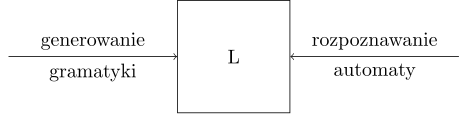

In [20]:
%%tikz -sc=2.0
\begin{tikzpicture}
    \node[draw, minimum size=2cm] (square) {L};
    \draw[<-] (square.west) -- node[anchor=south]{generowanie} node[anchor=north]{gramatyki} ++(-3,0);
    \draw[<-] (square.east) -- node[anchor=south]{rozpoznawanie} node[anchor=north]{automaty} ++(3,0);
\end{tikzpicture}

## Alfabet

Alfabet to zbiór atomowych dozwolonych symboli

Przykład: $\set{a, b, c, d}$

## Słowo

Ciąg symboli nad alfabetem

- $\epsilon$ - słowo puste
- $\set{K, L, O, P, S} \ne "KLOPS"$, ponieważ słowa mają dodane znaczenie, w postaci tego do którego języka należą.

### Konkatenacja

1. $\text{Dla } P=a_1...a_n \text{ i } Q=b_1...b_n, \text{ to } PQ=a_1...a_nb_1...b_n$
2. $P\epsilon = P$
3. $\epsilon\epsilon = \epsilon$

- Łączna
- Nieprzemienna
- Brak el. odwrotnego

### Podsłowo

1. $P = Q_1 | Q | Q_2$
2. $Q \sub P$

### Długość słowa

1. $|\epsilon| = 0$
2. $|Pa| = |P| + 1$
3. $|PQ| = |P| + |Q|$

### Potęga słowa

1. $P^0 = \epsilon$
2. $P^{n + 1} = P^nP$

### Odbicie

1. $\epsilon^-1 = \epsilon$
2. $(Pa)^-1 = aP^-1$


## Język

Zbiór dozwolonych słów nad alfabetem

- $V^*$ - zbiór wszystkich języków
- $V^+ = V^* \ {\epsilon}$
- $L \in V^*$
- $\set{a, ab} \ne {\epsilon, a, ab}$ ponieważ inaczej operacje na językach by nie działały

### Konkatenacja

$$
L_1 = \set{a, aa}, L_2 = \set{b, aba}, L_1L_2 = \set{ab, aaba, aab, aaaba}
$$

|    | b   | aba   |
|----|-----|-------|
| a  | ab  | aaba  |
| aa | aab | aaaba |

- $|L_1L_2| \le |L_1| \cdot |L_2|$ bo eps wszystko psuje 

$$
L_1 = \set{a^n : n \ge 0}, L_2 = \set{b^n : n \ge 0}, L_1L_2 = \set{a^nb^m : n, m \ge 0}
$$

### Potęgowanie

$$
L = \set{a, ab}, L^0 = \set{\epsilon}, L^1 = \set{a, ab}, L^2 = L \cdot L
$$

**Potęgowanie na językach jest dziwne**

$$
L = \set{a^n : n \ge 0}, L^2 = \set{a^n a^m : a, m \ge 0} = \set{a^n : a \ge 0} = L
$$

Potęgowanie języku **nie** zwiększyło mocy

$$
L = \set{a^n : n > 0}, L^2 = \set{a^n a^m : a, m > 0} = L \ \set{a} = {a^n : n > 1}
$$

Potęgowanie *zmniejszyło* moc języku


## Dzielenie słów

$$
P \in L^n \rightarrow \text{ można podzielić } P \text{ na } n \text{ (niekoniecznie różnych) słów}
$$

$$
L = \set{a, ab}, "aababaabab" \in L^n, n=?
$$

Jest to problem wykładniczy, który wymaga stworzenia drzewa różnych możliwości.


In [18]:
from __future__ import annotations

L = set(["a", "ab", "ba", "aab", "baab"])

def deconstruct(language: set[str], target: str) -> list[tuple[str, str]]:
    result = []
    for el in language:
        if target.startswith(el):
            result.append((el, target[len(el):]))
    return result

class State:
    def __init__(self, target: str, language: set[str], el:str | None = None, parent: "State" | None = None):
        self.target = target
        self.language = language
        self.parent = parent
        self.el = el
        self.children:list["State"] = []
        for el, target in deconstruct(language, target):
            self.children.append(State(target, language, el, self))
    def get_possible_deconstructions(self) -> list[list[str]]:
        res = []
        for child in self.children:
            for decon in child.get_possible_deconstructions():
                # wyrzucamy rozwiązania które nie doszły do końca
                if sum(len(x) for x in decon) != len(self.target):
                    continue
                if self.el:
                    decon.insert(0, self.el)
                res.append(decon)
        return res or [[self.el]]
            
top = State("aababaabab", L)

print(top.get_possible_deconstructions())


[['aab', 'a', 'ba', 'ab', 'ab'], ['aab', 'a', 'baab', 'ab'], ['aab', 'ab', 'aab', 'ab'], ['aab', 'ab', 'a', 'ab', 'ab'], ['a', 'a', 'ba', 'ba', 'ab', 'ab'], ['a', 'a', 'ba', 'baab', 'ab'], ['a', 'ab', 'a', 'ba', 'ab', 'ab'], ['a', 'ab', 'a', 'baab', 'ab'], ['a', 'ab', 'ab', 'aab', 'ab'], ['a', 'ab', 'ab', 'a', 'ab', 'ab']]


## Domknięcie Kleenego

$$
L^* = \bigcup_{n \ge 0}^{\infty}L^n
$$

$$
L^+ = \bigcup_{n \ge 1}^{\infty}L^n
$$

$$
L_1 = \set{a}, L_1^* = \set{a^n : n \ge 0}, L_1^+ = \set{a^n : n > 0}
$$

$$
L_2 = \set{\epsilon, a}, L_2^* = \set{a^n : n \ge 0} = L_2^+
$$

$$
L = \set{aa, ab, ba, bb}, L^* = \set{P \in \set{a, b}^* : 2 | |P|} = \text{wszystkie słowa nad alfabetem {a, b} o parzystej długości}
$$

- $L^+ \sub L^*$
- $\epsilon \in L \rightarrow L^+ = L^*$
- $(L^*)^* = L^*$
- $L_1 \sub L_2 \rightarrow L_1^* \sub L_2^*$

## Deterministyczne automaty skończenie stanowe